# Imports + Carregamento

In [ ]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Pré-processamento
from sklearn.preprocessing import MinMaxScaler
from transformers import BertTokenizer

In [ ]:
url = 'https://raw.githubusercontent.com/pedroaugvsto/OpenSourCI/refs/heads/main/analise_de_dados/data/spotify.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


# Sobre o dataset

Dataset contendo as 100 músicas mais famosas da década de 2010

**17 colunas:**
- 5 categóricas
- 1 data
- 11 numéricos

**Descrição das colunas**
- **title:** Título da música
- **artist:** Nome do artista
- **genre:** Gênero da música
- **year released:** Ano de lançamento
- **added:** Dia em que ela foi adicionada à playlist(não relevante)
- **bpm:**	Batidas por minuto
- **nrgy:**	Energia
- **dnce:**	Dançabilidade
- **dB:**	Decibel - Quão alta é
- **live:**	Probabilidade da música ser gravada ao vivo
- **val:**	Quão positiva é a vibe dela
- **dur:**	Duração em segundos
- **acous:**	Quão acústica ela é
- **spch:**	O quão a música é focada no que tá sendo dito
- **pop:**	Score de popularidade da música
- **top year:**	Ano no qual a música foi hit
- **artist type:**	Diz se o artista é solo, duo, trio ou banda

# Análise e Limpeza Iniciais

## Informações sobre valores nulos e válidos



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


In [ ]:
df.isnull().sum()

,0
title,3
artist,3
top genre,3
year released,3
added,3
bpm,3
nrgy,3
dnce,3
dB,3
live,3


## Estatísticas descritivas

In [ ]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


## Eliminando linhas com nulos e duplicatas

Verificando nulos

In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
title,0
artist,0
top genre,0
year released,0
added,0
bpm,0
nrgy,0
dnce,0
dB,0
live,0


Verificando duplicatas

In [ ]:
df.duplicated().sum()

np.int64(0)

## Correção de tipos

In [ ]:
df['year released'] = df['year released'].astype(int)
df['top year'] = df['top year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   int64  
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   int64  
 16  artist type    1000 non-null   object 
dtypes: float64(10), int64(2), object(5)
memory usage: 140.6+ K

## Padronização de valores

In [ ]:
display(df['top genre'].unique())

array(['dance pop', 'pop soul', 'atl hip hop', 'pop rap', 'big room',
       'canadian hip hop', 'disco house', 'romanian house', 'lilith',
       'detroit hip hop', 'asian american hip hop', 'east coast hip hop',
       'neo mellow', 'canadian pop', 'reggae fusion', 'idol', 'art pop',
       'hip hop', 'pop', 'talent show', 'modern alternative rock',
       'indietronica', 'grime', 'barbadian pop', 'acoustic pop',
       'dutch house', 'belgian pop', 'contemporary country', 'boy band',
       'celtic rock', 'edm', 'indie rock', 'australian dance',
       'british soul', 'eau claire indie', 'dancefloor dnb',
       'permanent wave', 'hip pop', 'g funk', 'baroque pop', 'indie pop',
       'chicago rap', 'indie poptimism', 'french shoegaze',
       'alternative metal', 'indie folk', 'alternative rock',
       'uk hip hop', 'electro house', 'garage rock', 'israeli pop',
       'alternative r&b', 'australian pop', 'candy pop', 'modern rock',
       'conscious hip hop', 'folk-pop', 'alterna

In [ ]:
genre_map = {
    # Categoria: Pop
    'dance pop': 'Pop', 'pop soul': 'Pop', 'canadian pop': 'Pop', 'art pop': 'Pop',
    'pop': 'Pop', 'barbadian pop': 'Pop', 'acoustic pop': 'Pop', 'belgian pop': 'Pop',
    'boy band': 'Pop', 'hip pop': 'Pop', 'baroque pop': 'Pop', 'indie pop': 'Pop',
    'indie poptimism': 'Pop', 'israeli pop': 'Pop', 'australian pop': 'Pop',
    'candy pop': 'Pop', 'folk-pop': 'Pop', 'k-pop': 'K-Pop', 'electropop': 'Pop',
    'austrian pop': 'Pop', 'irish pop': 'Pop', 'bubblegum dance': 'Pop',
    'chill pop': 'Pop', 'french indie pop': 'Pop', 'german pop': 'Pop',
    'indie pop rap': 'Pop', 'danish pop': 'Pop', 'social media pop': 'Pop',
    'bedroom pop': 'Pop', 'colombian pop': 'Pop', 'talent show': 'Pop', 'idol': 'Pop',

    # Categoria: Hip Hop / Rap
    'atl hip hop': 'Hip Hop / Rap', 'pop rap': 'Hip Hop / Rap', 'canadian hip hop': 'Hip Hop / Rap',
    'detroit hip hop': 'Hip Hop / Rap', 'asian american hip hop': 'Hip Hop / Rap',
    'east coast hip hop': 'Hip Hop / Rap', 'hip hop': 'Hip Hop / Rap', 'grime': 'Hip Hop / Rap',
    'chicago rap': 'Hip Hop / Rap', 'uk hip hop': 'Hip Hop / Rap', 'conscious hip hop': 'Hip Hop / Rap',
    'gangster rap': 'Hip Hop / Rap', 'nyc rap': 'Hip Hop / Rap', 'australian hip hop': 'Hip Hop / Rap',
    'dutch hip hop': 'Hip Hop / Rap', 'kentucky hip hop': 'Hip Hop / Rap', 'new jersey rap': 'Hip Hop / Rap',
    'ghanaian hip hop': 'Hip Hop / Rap', 'san diego rap': 'Hip Hop / Rap', 'melodic rap': 'Hip Hop / Rap',
    'london rap': 'Hip Hop / Rap', 'florida rap': 'Hip Hop / Rap', 'emo rap': 'Hip Hop / Rap',
    'ohio hip hop': 'Hip Hop / Rap', 'dfw rap': 'Hip Hop / Rap', 'hawaiian hip hop': 'Hip Hop / Rap',
    'dirty south rap': 'Hip Hop / Rap', 'memphis hip hop': 'Hip Hop / Rap', 'comedy rap': 'Hip Hop / Rap',
    'rap': 'Hip Hop / Rap', 'cali rap': 'Hip Hop / Rap', 'north carolina hip hop': 'Hip Hop / Rap',
    'lgbtq+ hip hop': 'Hip Hop / Rap', 'argentine hip hop': 'Hip Hop / Rap', 'uk drill': 'Hip Hop / Rap',

    # Categoria: Electronic / Dance
    'big room': 'Electronic / Dance', 'disco house': 'Electronic / Dance', 'romanian house': 'Electronic / Dance',
    'indietronica': 'Electronic / Dance', 'dutch house': 'Electronic / Dance', 'edm': 'Electronic / Dance',
    'australian dance': 'Electronic / Dance', 'dancefloor dnb': 'Electronic / Dance', 'electro house': 'Electronic / Dance',
    'alternative dance': 'Electronic / Dance', 'brostep': 'Electronic / Dance', 'downtempo': 'Electronic / Dance',
    'bass trap': 'Electronic / Dance', 'metropopolis': 'Electronic / Dance', 'electro': 'Electronic / Dance',
    'destroy techno': 'Electronic / Dance', 'tropical house': 'Electronic / Dance', 'deep disco house': 'Electronic / Dance',
    'complextro': 'Electronic / Dance', 'deep groove house': 'Electronic / Dance', 'deep house': 'Electronic / Dance',
    'aussietronica': 'Electronic / Dance', 'new french touch': 'Electronic / Dance', 'afroswing': 'Electronic / Dance',
    'basshall': 'Electronic / Dance', 'afro dancehall': 'Electronic / Dance', 'dark clubbing': 'Electronic / Dance',

    # Categoria: Rock
    'modern alternative rock': 'Rock', 'celtic rock': 'Rock', 'permanent wave': 'Rock', 'alternative metal': 'Rock',
    'alternative rock': 'Rock', 'garage rock': 'Rock', 'modern rock': 'Rock', 'emo': 'Rock',
    'modern folk rock': 'Rock', 'alternative pop rock': 'Rock', 'classic rock': 'Rock',

    # Categoria: Indie / Alternative
    'neo mellow': 'Indie / Alternative', 'indie rock': 'Indie / Alternative', 'eau claire indie': 'Indie / Alternative',
    'indie folk': 'Indie / Alternative', 'la indie': 'Indie / Alternative', 'australian indie': 'Indie / Alternative',
    'icelandic indie': 'Indie / Alternative', 'australian psych': 'Indie / Alternative', 'canadian indie': 'Indie / Alternative',
    'alt z': 'Indie / Alternative', 'french shoegaze': 'Indie / Alternative', 'lilith': 'Indie / Alternative',

    # Categoria: R&B / Soul
    'british soul': 'R&B / Soul', 'alternative r&b': 'R&B / Soul', 'contemporary r&b': 'R&B / Soul',
    'neo soul': 'R&B / Soul', 'canadian contemporary r&b': 'R&B / Soul', 'g funk': 'R&B / Soul',
    'afrofuturism': 'R&B / Soul',

    # Categoria: Outros
    'reggae fusion': 'Reggae', 'latin': 'Latin', 'adult standards': 'Standards', 'folk-pop': 'Folk',
    'contemporary country': 'Country', 'irish singer-songwriter': 'Folk', 'black americana': 'Folk',
    'comic': 'Other', 'hollywood': 'Other'
}


In [ ]:
df['genre'] = df['top genre'].map(genre_map)
display(df[['top genre', 'genre']].head())

,top genre,genre
0,dance pop,Pop
1,dance pop,Pop
2,pop soul,Pop
3,atl hip hop,Hip Hop / Rap
4,atl hip hop,Hip Hop / Rap


In [ ]:
display(df['genre'].unique())

array(['Pop', 'Hip Hop / Rap', 'Electronic / Dance',
       'Indie / Alternative', 'Reggae', 'Rock', 'Country', 'R&B / Soul',
       'Folk', 'K-Pop', 'Standards', 'Other', 'Latin'], dtype=object)

# Visualização dos dados

## Boxplots

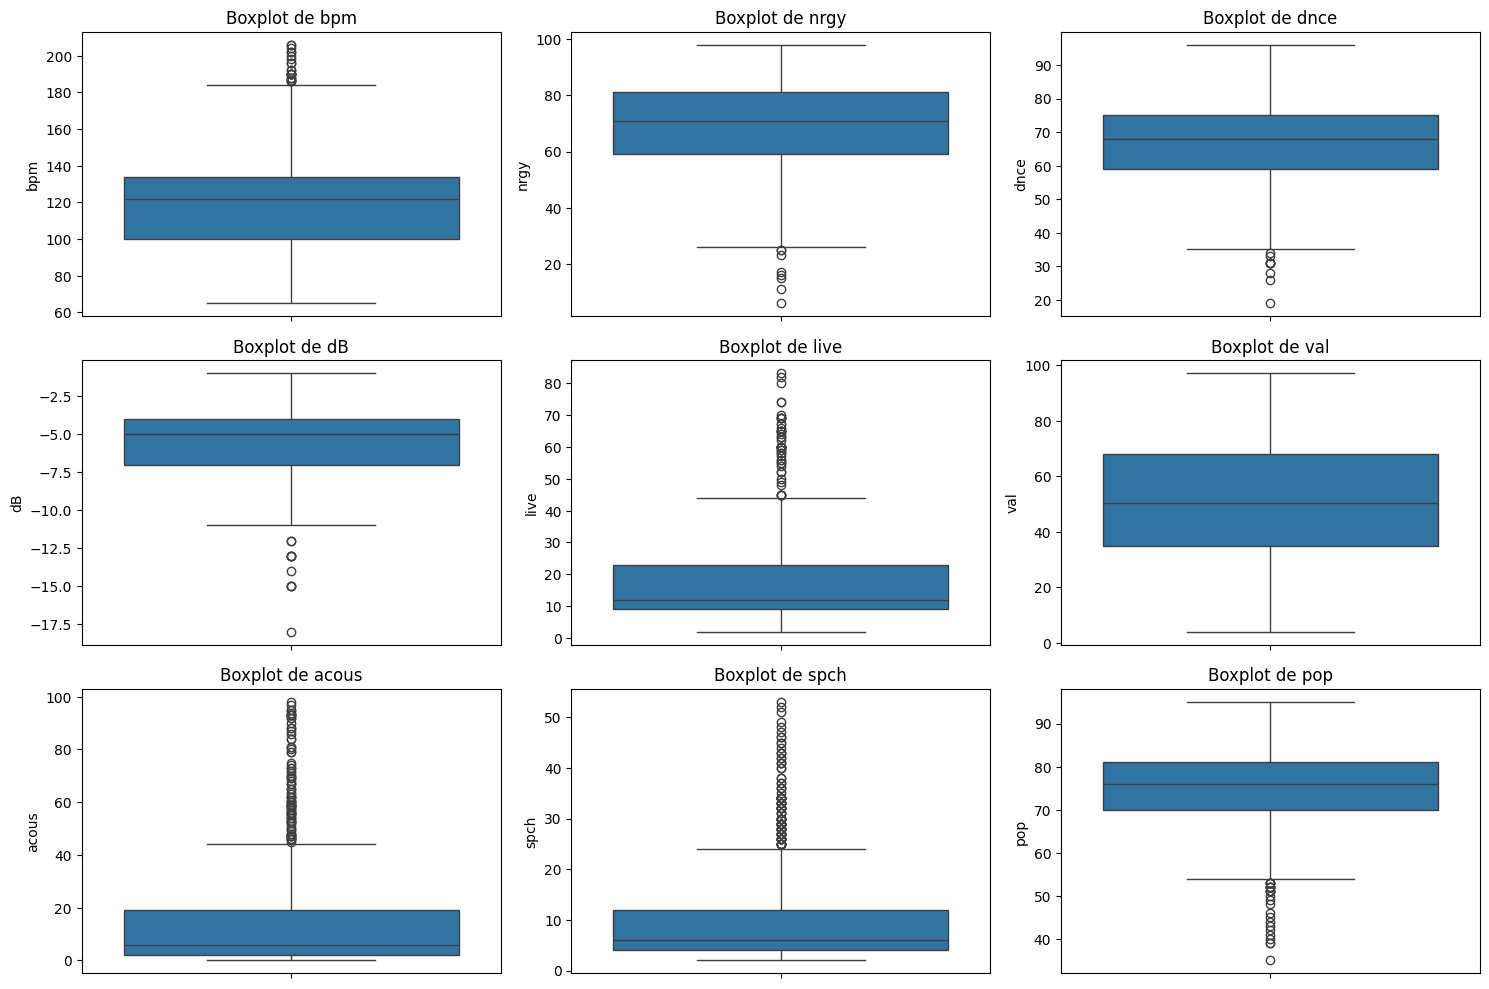

In [ ]:
attributes = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']

plt.figure(figsize=(15, 10))
for i, attr in enumerate(attributes):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[attr])
    plt.title(f'Boxplot de {attr}')
plt.tight_layout()
plt.show()

## Gráfico de barras

/tmp/ipython-input-247867773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


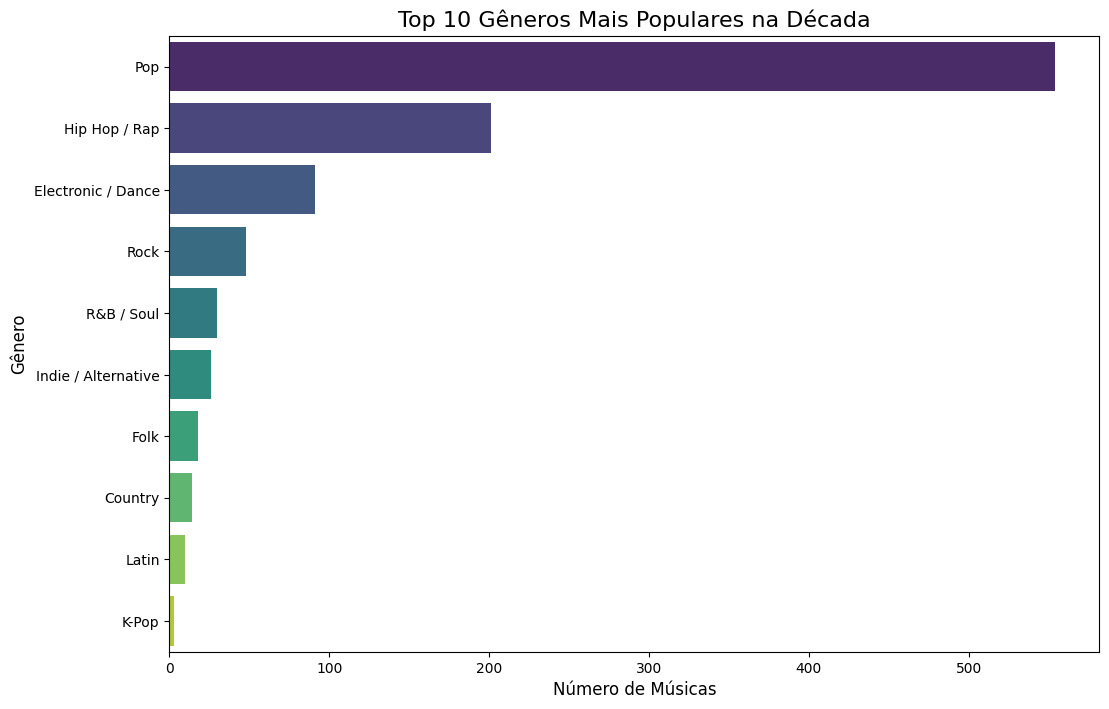

In [ ]:
plt.figure(figsize=(12, 8))
genre_counts = df['genre'].value_counts().nlargest(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Gêneros Mais Populares na Década', fontsize=16)
plt.xlabel('Número de Músicas', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()

/tmp/ipython-input-1577581494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='plasma')


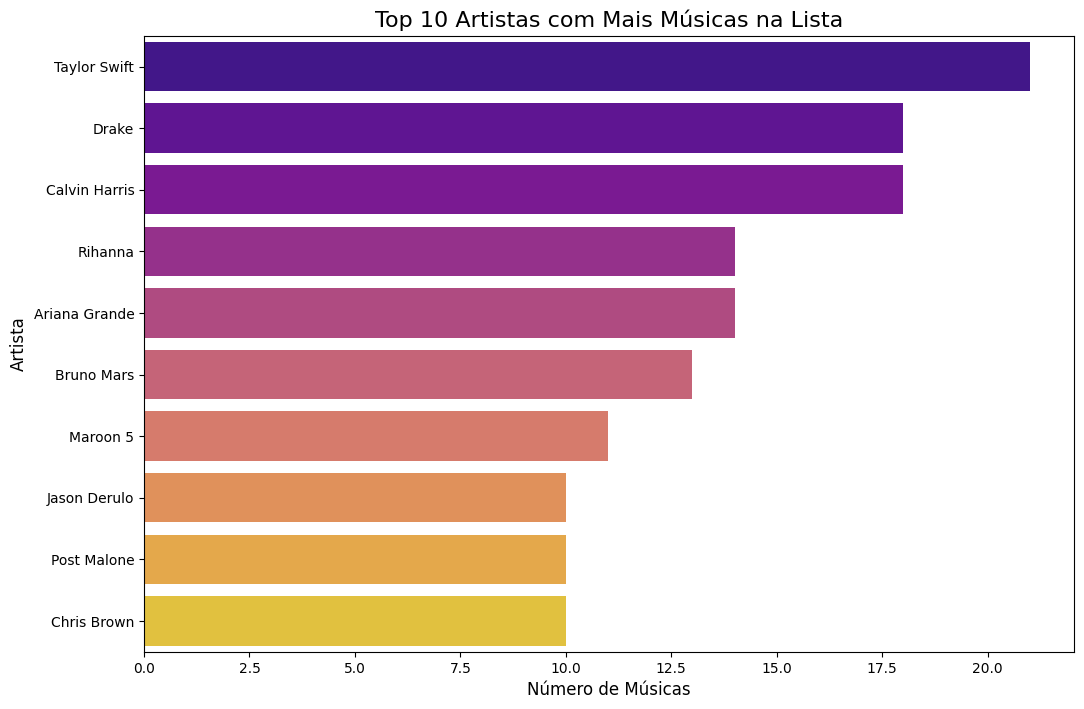

In [ ]:
plt.figure(figsize=(12, 8))
artist_counts = df['artist'].value_counts().nlargest(10)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='plasma')
plt.title('Top 10 Artistas com Mais Músicas na Lista', fontsize=16)
plt.xlabel('Número de Músicas', fontsize=12)
plt.ylabel('Artista', fontsize=12)
plt.show()

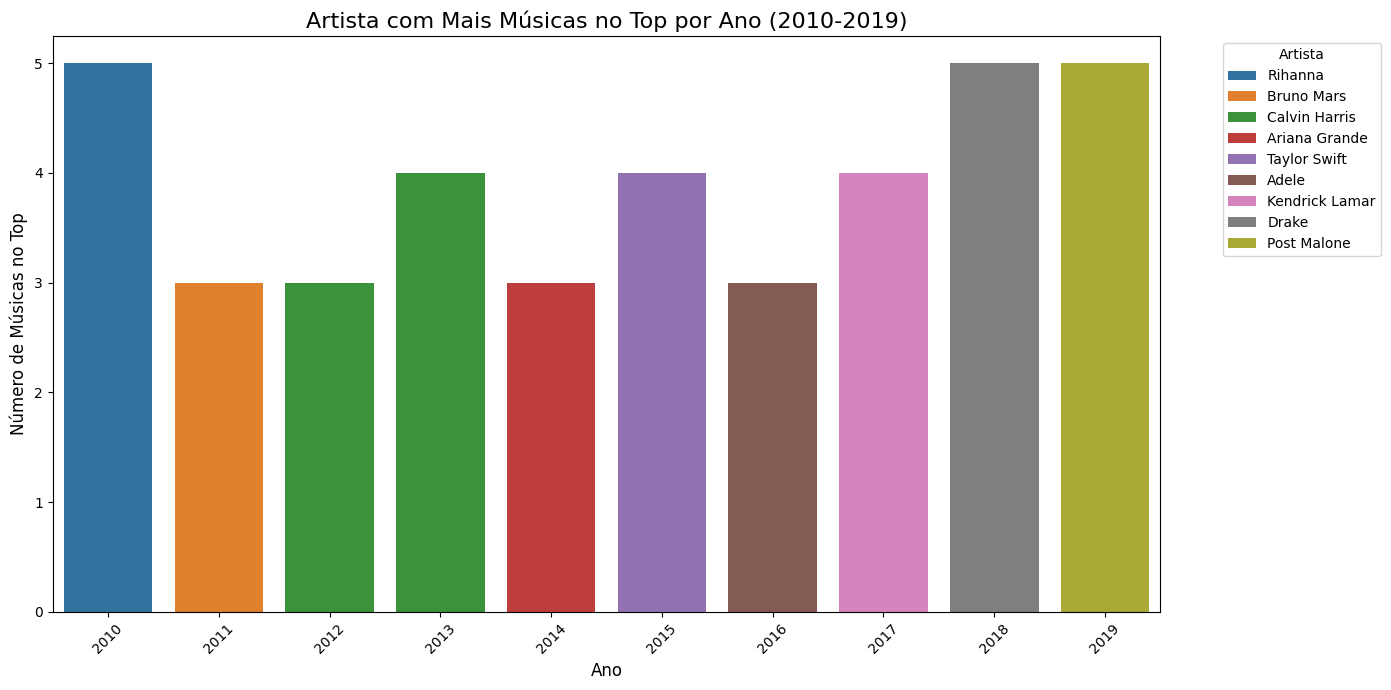

In [ ]:
artist_counts_per_year = df.groupby(['top year', 'artist']).size().reset_index(name='song_count')
most_popular_artist_per_year = artist_counts_per_year.loc[artist_counts_per_year.groupby('top year')['song_count'].idxmax()]

plt.figure(figsize=(14, 7))
sns.barplot(x='top year', y='song_count', hue='artist', data=most_popular_artist_per_year, palette='tab10', dodge=False)
plt.title('Artista com Mais Músicas no Top por Ano (2010-2019)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Músicas no Top', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Artista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Gráfico de dispersão

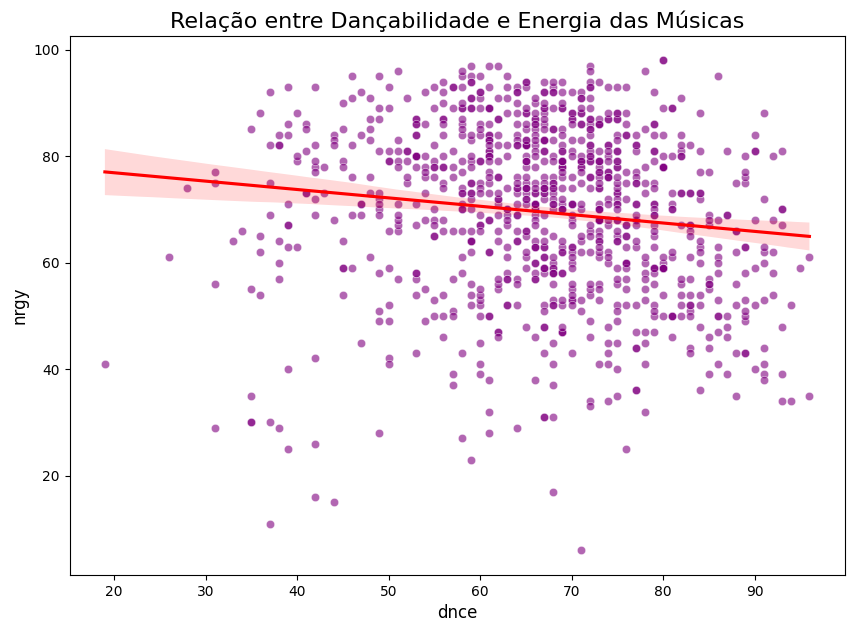

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='dnce', y='nrgy', data=df, alpha=0.6, color='purple')
plt.title('Relação entre Dançabilidade e Energia das Músicas', fontsize=16)
plt.xlabel('Dançabilidade (dnce)', fontsize=12)
plt.ylabel('Energia (nrgy)', fontsize=12)
# Opcional: Adicionar uma linha de regressão para visualizar a tendência
sns.regplot(x='dnce', y='nrgy', data=df, scatter=False, color='red')
plt.show()

## Histograma

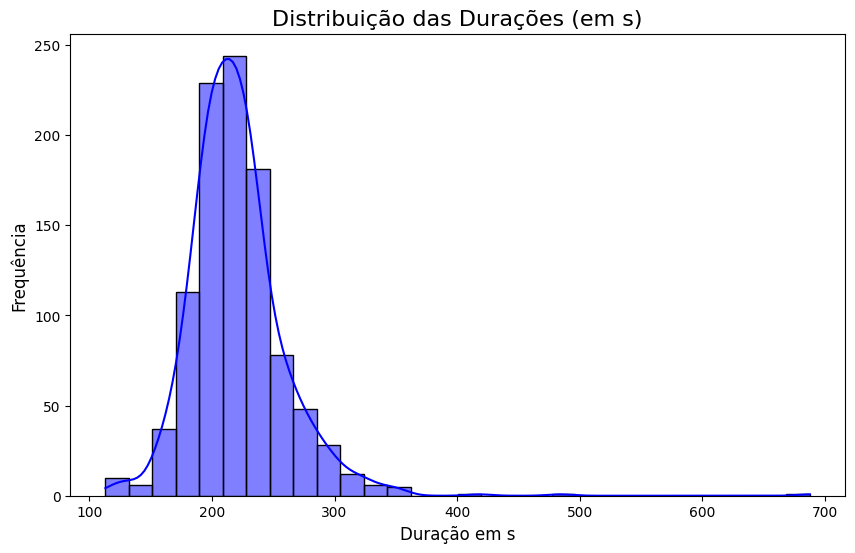

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['dur'], bins=30, kde=True, color='blue')
plt.title('Distribuição das Durações (em s)', fontsize=16)
plt.xlabel('Duração em s', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

## Gráfico de linhas

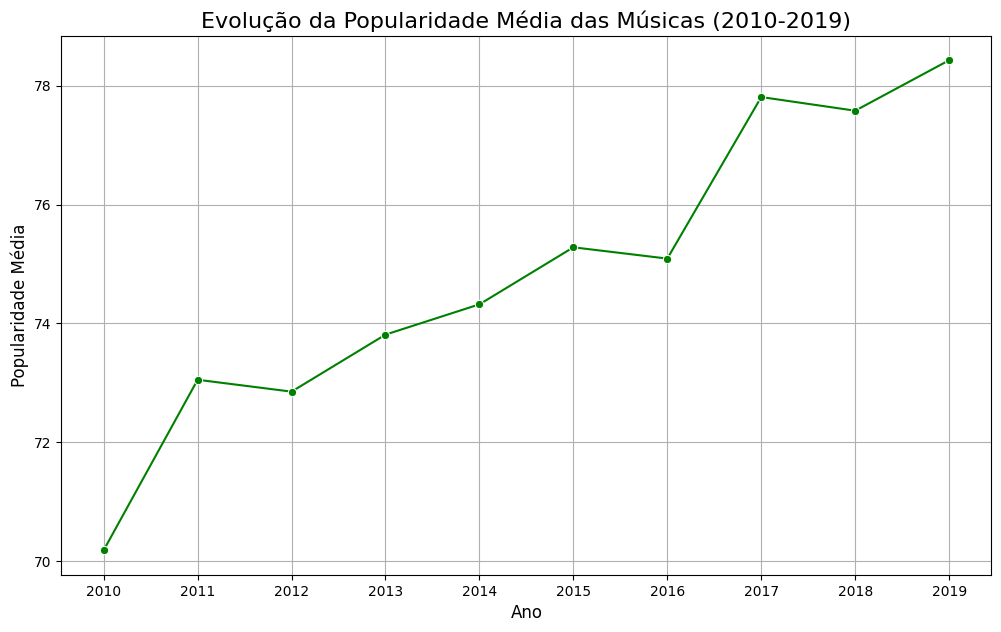

In [ ]:
avg_popularity_per_year = df.groupby('top year')['pop'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(x='top year', y='pop', data=avg_popularity_per_year, marker='o', color='green')
plt.title('Evolução da Popularidade Média das Músicas (2010-2019)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)
plt.xticks(avg_popularity_per_year['top year'])
plt.grid(True)
plt.show()

## Gráfico de setores

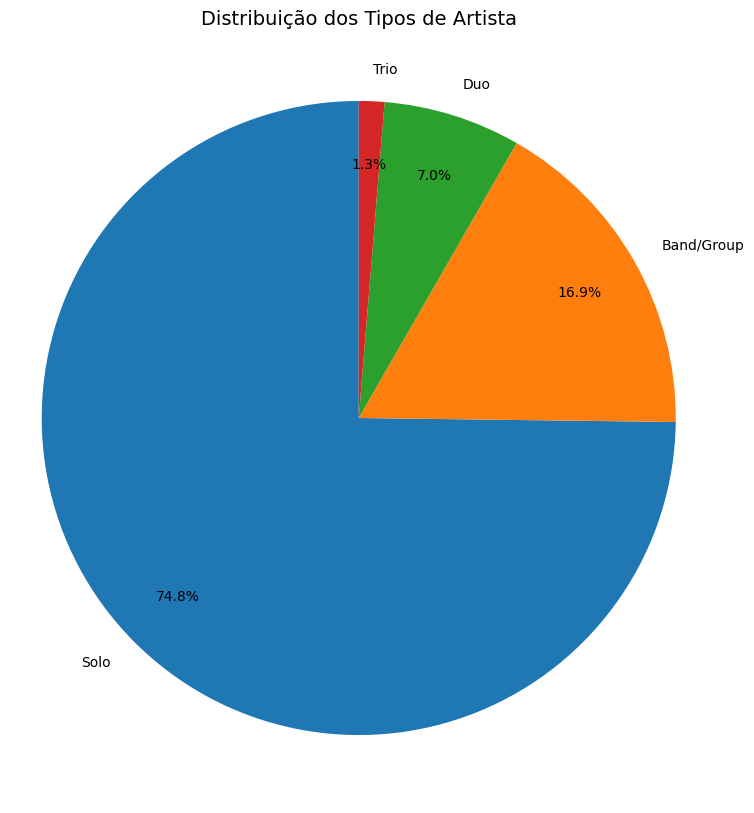

In [ ]:
artist_type_counts = df['artist type'].value_counts()
plt.figure(figsize=(9, 10))
plt.pie(artist_type_counts, labels=artist_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10'), pctdistance=0.8)
plt.title('Distribuição dos Tipos de Artista', fontsize=14)
plt.axis('equal')
plt.show()

## Heatmap de Correlação

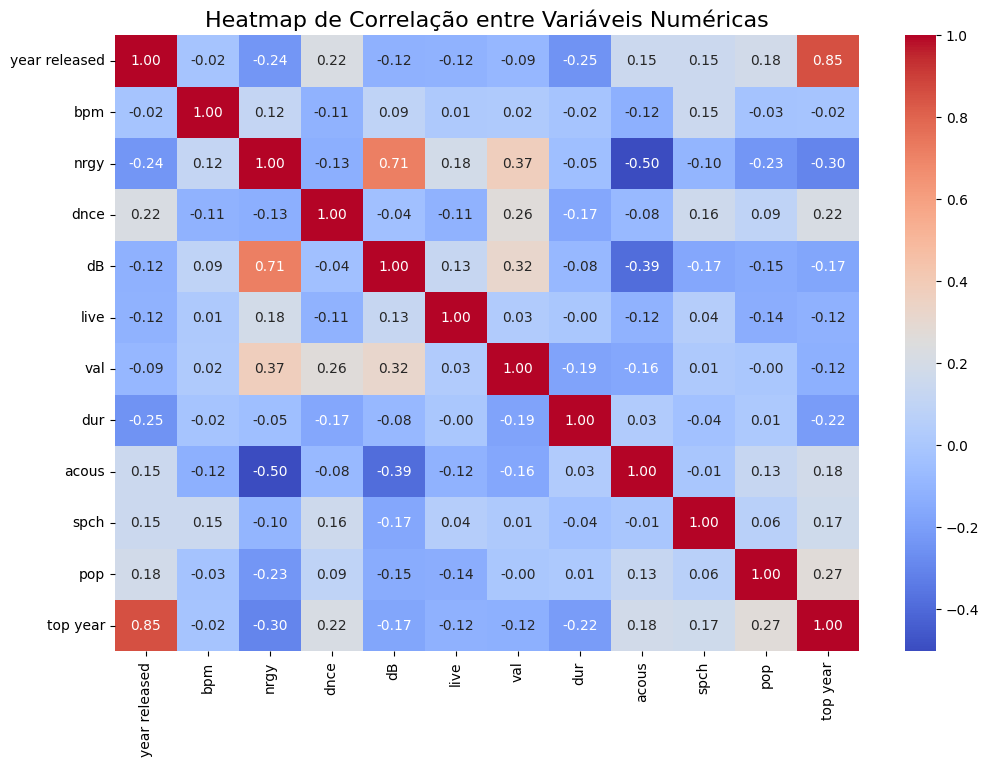

In [ ]:
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

## Wordcloud

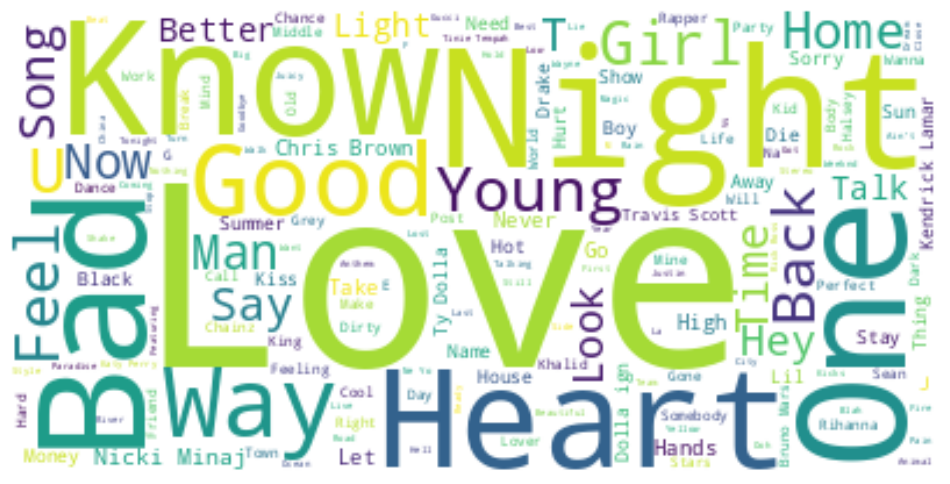

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['feat', 'Edit', 'Radio', 'Remix'])
text = " ".join(title for title in df['title'].astype(str))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Pré-Processamento

## Feature Engineering

In [ ]:
df['feat'] = df['title'].str.contains(r'\(feat|\(with|\(featuring|ft\.', case=False, na=False)
display(df[['title', 'feat']].head())

,title,feat
0,STARSTRUKK (feat. Katy Perry),True
1,My First Kiss (feat. Ke$ha),True
2,I Need A Dollar,False
3,Airplanes (feat. Hayley Williams of Paramore),True
4,Nothin' on You (feat. Bruno Mars),True


## Limpeza de Outliers

In [ ]:
# Aqui usando método dos quartis
attributes = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']

for col in attributes:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_processed = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

display(df_processed.head())
display(df_processed.shape)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre,feat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo,Pop,True
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo,Pop,True
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo,Pop,False
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo,Hip Hop / Rap,True
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo,Hip Hop / Rap,True


(975, 19)

## Encoding

In [ ]:
df_processed = pd.get_dummies(df_processed, columns=['genre', 'artist type'], drop_first=True)
display(df_processed.head())

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,...,genre_Latin,genre_Other,genre_Pop,genre_R&B / Soul,genre_Reggae,genre_Rock,genre_Standards,artist type_Duo,artist type_Solo,artist type_Trio
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,...,False,False,True,False,False,False,False,True,False,False
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,...,False,False,True,False,False,False,False,True,False,False
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,...,False,False,True,False,False,False,False,False,True,False
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,...,False,False,False,False,False,False,False,False,True,False


## Normalização

In [ ]:
scaler = MinMaxScaler()
df_processed[attributes] = scaler.fit_transform(df_processed[attributes])
display(df_processed.head())

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,...,genre_Latin,genre_Other,genre_Pop,genre_R&B / Soul,genre_Reggae,genre_Rock,genre_Standards,artist type_Duo,artist type_Solo,artist type_Trio
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,0.531915,0.815217,0.545455,0.705882,0.259259,...,False,False,True,False,False,False,False,True,False,False
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,0.517730,0.902174,0.636364,0.823529,0.419753,...,False,False,True,False,False,False,False,True,False,False
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,0.212766,0.456522,0.844156,0.647059,0.086420,...,False,False,True,False,False,False,False,False,True,False
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,0.198582,0.880435,0.610390,0.823529,0.024691,...,False,False,False,False,False,False,False,False,True,False
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,0.276596,0.858696,0.649351,0.705882,0.086420,...,False,False,False,False,False,False,False,False,True,False


## Tokenização

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

df_processed['title_tokens'] = df_processed['title'].apply(lambda texto: tokenizer.encode(texto, truncation=True, max_length=128))
df_processed['artist_tokens'] = df_processed['artist'].apply(lambda texto: tokenizer.encode(texto, truncation=True, max_length=128))

print("DataFrame Processado")
display(df_processed)
print("\nExemplo de tokens para o primeiro título")
display(df_processed['title_tokens'].iloc[0])
print("\nExemplo de tokens para o primeiro artista")
display(df_processed['artist_tokens'].iloc[0])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

DataFrame Processado


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,...,genre_Pop,genre_R&B / Soul,genre_Reggae,genre_Rock,genre_Standards,artist type_Duo,artist type_Solo,artist type_Trio,title_tokens,artist_tokens
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,0.531915,0.815217,0.545455,0.705882,0.259259,...,True,False,False,False,False,True,False,False,"[101, 103737, 32995, 11273, 12022, 11733, 1173...","[101, 124, 55859, 106, 124, 102]"
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,0.517730,0.902174,0.636364,0.823529,0.419753,...,True,False,False,False,False,True,False,False,"[101, 11590, 12128, 22280, 113, 17537, 119, 47...","[101, 124, 55859, 106, 124, 102]"
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,0.212766,0.456522,0.844156,0.647059,0.086420,...,True,False,False,False,False,False,True,False,"[101, 146, 30255, 138, 24597, 102]","[101, 82120, 139, 63279, 10350, 102]"
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,0.198582,0.880435,0.610390,0.823529,0.024691,...,False,False,False,False,False,False,True,False,"[101, 11704, 47828, 10107, 113, 17537, 119, 27...","[101, 139, 119, 183, 119, 139, 102]"
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,0.276596,0.858696,0.649351,0.705882,0.086420,...,False,False,False,False,False,False,True,False,"[101, 16040, 14383, 112, 10135, 11065, 113, 17...","[101, 139, 119, 183, 119, 139, 102]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,0.638298,0.728261,0.831169,0.823529,0.123457,...,False,False,False,False,False,False,True,False,"[101, 39675, 10858, 57277, 102059, 60675, 102]","[101, 43346, 12812, 102]"
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,0.106383,0.478261,0.467532,0.529412,0.962963,...,False,False,False,False,False,False,True,False,"[101, 38478, 109845, 19282, 12022, 10738, 1173...","[101, 25627, 117, 10117, 140, 91824, 10667, 102]"
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,0.269504,0.771739,0.909091,0.764706,0.086420,...,False,False,False,False,False,False,True,False,"[101, 73219, 37134, 113, 17537, 119, 96982, 83...","[101, 21291, 102]"
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,0.517730,0.565217,0.441558,0.705882,0.098765,...,False,False,False,False,False,True,False,False,"[101, 47256, 169, 94071, 10112, 113, 17537, 11...","[101, 12478, 157, 111, 88570, 13005, 102]"



Exemplo de tokens para o primeiro título


[101,
 103737,
 32995,
 11273,
 12022,
 11733,
 11733,
 113,
 17537,
 119,
 66583,
 20191,
 114,
 102]


Exemplo de tokens para o primeiro artista


[101, 124, 55859, 106, 124, 102]